,MAPID,YEAR_CREATED,NAME,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,MERGED_ADDRESS,NUMBER_OF_PLOTS,NUMBER_OF_FOOD_TREES,NOTES,FOOD_TREE_VARIETIES,OTHER_FOOD_ASSETS,JURISDICTION,STEWARD_OR_MANAGING_ORGANIZATION,PUBLIC_E_MAIL,WEBSITE,Geo Local Area,Geom,geo_point_2d
1,FA006,2011,Adanac Park Community Garden,1025,NaN,Boundary,Road,"1025 Boundary Road, Vancouver, BC",50.0,8,Some plots are accessible,1 Early McIntosh Apple; 1 Jonagold apple; 2 it...,NaN,Park Board,Adanac Community Garden Society,Adanaccommunitygarden@gmail.com,http://adanacparkcommunitygarden.blogspot.ca/,Hastings-Sunrise,"{""coordinates"": [-123.02439453, 49.27558227], ...","49.27558227, -123.02439453"
2,FA013,2012,Brewery Creek Community Garden,2390,NaN,Brunswick,St,"2390 Brunswick St, Vancouver, BC",40.0,11,NaN,Bramley's seedling apple; cortland apple; earl...,NaN,Park Board,Urban Diggers Society,brewerycreekgarden@gmail.com,http://brewerycreekgarden.wix.com/home,Mount Pleasant,"{""coordinates"": [-123.09573323, 49.26416489], ...","49.26416489, -123.09573323"
3,FA014,NaN,Burrard View Park,650,N,Penticton,St,"650 N Penticton St, Vancouver, BC",0.0,1,NaN,Cherry,NaN,Park Board,NaN,NaN,NaN,Hastings-Sunrise,"{""coordinates"": [-123.0519175, 49.2912065], ""t...","49.2912065, -123.0519175"
4,FA015,pre-1970,Callister Park,2875,NaN,Oxford,St,"2875 Oxford St, Vancouver, BC",0.0,4,NaN,Apple,NaN,Park Board,NaN,NaN,NaN,Hastings-Sunrise,"{""coordinates"": [-123.0453833, 49.28618], ""typ...","49.28618, -123.0453833"
5,FA016,2013,Cambie Park Community Garden,500,W,54th,Av,"500 W 54th Av, Vancouver, BC",30.0,NaN,NaN,NaN,NaN,Park Board,Cambie Park Community Gardening Society,southvangreenthumbs@gmail.com,NaN,Oakridge,"{""coordinates"": [-123.1186284, 49.22130853], ""...","49.22130853, -123.1186284"


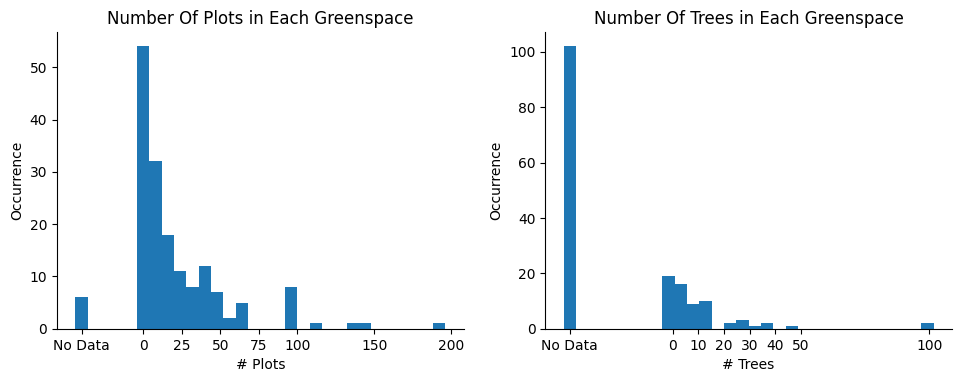

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import hamhelper.colours as hc
import hamhelper.plotting as hp

dataFile = r'data\community-gardens-and-food-trees.csv'
df = pd.read_csv(dataFile, delimiter=';').iloc[1: , :]  # drop first row of all NaNs for pre 2010 private entries


# Define helper functions
def get_lat_lon(df, col='geo_point_2d'):
    loc = df[col].to_numpy()
    latitudes = np.empty_like(loc)
    longitudes = np.empty_like(loc)
    for _, entry in enumerate(loc[::]):
        lat, lon = entry.split(', ')
        latitudes[_] = float(lat)
        longitudes[_] = float(lon)
    return latitudes, longitudes


display(df.head())
trees= df['NUMBER_OF_FOOD_TREES'].to_numpy()
trees = np.where(trees == 'yes', 1, trees).astype(float)
trees = np.where(np.isnan(trees), -40, trees)

plots = df['NUMBER_OF_PLOTS'].to_numpy()
plots = np.where(np.isnan(plots), -40, plots)


fig, (axP, axT) = plt.subplots(1, 2, figsize = np.array([6.6, 2.2])*1.75)

axP.hist(plots, bins = 30, align='left')
axP.set(xlabel = '# Plots', ylabel = 'Occurrence', xticks = [-40, 0, 25, 50, 75, 100, 150, 200],
       xticklabels = ['No Data', 0, 25, 50, 75, 100, 150, 200],
       title = 'Number Of Plots in Each Greenspace')

axT.hist(trees, bins = 30, align='left')
axT.set(xlabel = '# Trees', ylabel = 'Occurrence', xticks = [-40, 0,10, 20, 30, 40, 50, 100],
       xticklabels = ['No Data', 0, 10, 20, 30, 40, 50, 100],
       title = 'Number Of Trees in Each Greenspace')

hp.despine(axT)
hp.despine(axP)
plt.savefig('plots/TreeAndPlotsDistributions.png', dpi = 300)
plt.show()

ii [0. 1.] 2
viridis
ii [0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.3411

c:\Users\hamis\OneDrive - Simon Fraser University (1sfu)\SFU Coding\CMNS 313\.venv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
c:\Users\hamis\OneDrive - Simon Fraser University (1sfu)\SFU Coding\CMNS 313\.venv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
c:\Users\hamis\OneDrive - Simon Fraser University (1sfu)\SFU Coding\CMNS 313\.venv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
c:\Users\hamis\OneDrive - Simon Fraser University (1sfu)\SFU Coding\CMNS 313\.venv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
c:\Users\hamis\OneDrive - Simon Fras

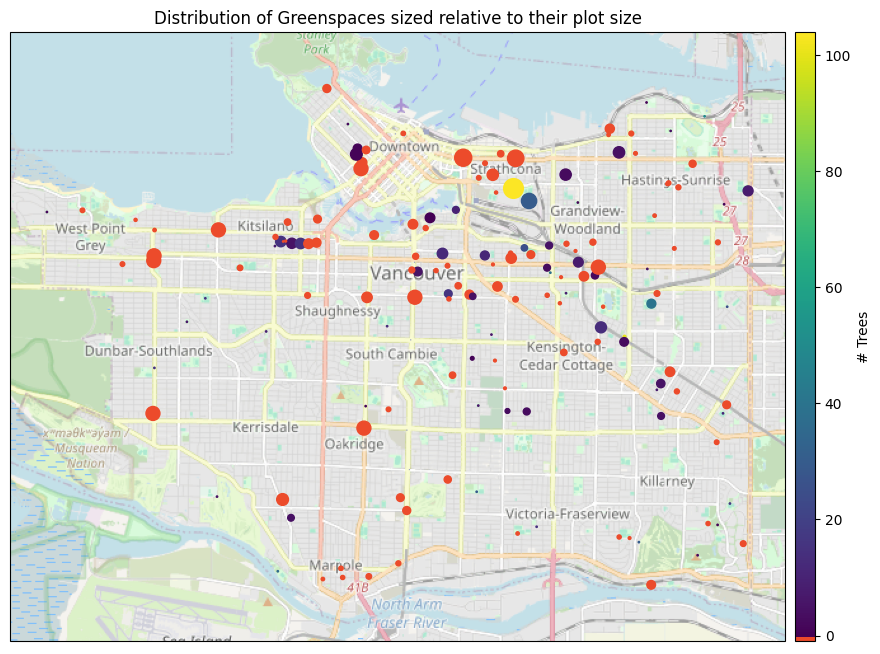

In [3]:
request = cimgt.OSM()

# Bounds: (lon_min, lon_max, lat_min, lat_max):
lat, lon = get_lat_lon(df,)
extent = np.array([np.min(lon), np.max(lon), np.min(lat), np.max(lat)]) + np.array([-0.05, 0.05, -0.05, 0.05])*0.2
np.savetxt('data/extent.csv', extent, delimiter=',')

fig, ax = plt.subplots(figsize=(10,16), subplot_kw=dict(projection=request.crs))
ax.set_extent(extent)
ax.add_image(request, 12, alpha=0.7)    # 5 = zoom level

# Just some random points/lines:
hmap = hc.HamColour.from_hex('red', ['#EE4B2B', '#EE4B2B'])
hmap += hc.HamColour.from_name('viridis', length=256)
c = ax.scatter(lon[::], lat[::], transform=ccrs.PlateCarree(), s=plots + 1, c=np.where(trees >= 0, trees, -1), zorder = 100, cmap = hmap.cmap)
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(c, cax=cax, label = '# Trees') # Similar to fig.colorbar(im, cax = cax)

ax.set(title='Distribution of Greenspaces sized relative to their plot size')
plt.savefig('plots/preliminaryGreenspaceDistribution.png', dpi=300, bbox_inches='tight')
plt.show()


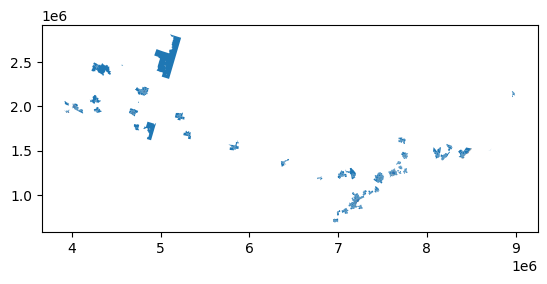

,CTUID,DGUID,CTNAME,LANDAREA,PRUID,geometry
0,5370001.08,2021S05075370001.08,0001.08,1.6383,35,"POLYGON ((7196507.366 869787.991, 7196501.617 ..."
1,0010002.00,2021S05070010002.00,0002.00,1.9638,10,"POLYGON ((8980216.643 2151065.360, 8980377.609..."
2,5370001.09,2021S05075370001.09,0001.09,1.9699,35,"POLYGON ((7196437.003 869160.246, 7196434.403 ..."
3,5370120.02,2021S05075370120.02,0120.02,76.9650,35,"POLYGON ((7189475.703 865662.849, 7189448.943 ..."
4,0010006.00,2021S05070010006.00,0006.00,1.0467,10,"POLYGON ((8980091.143 2152478.609, 8980100.254..."


In [13]:
import geopandas

data = geopandas.read_file(r"shapefiles\censusTracts\lct_000b21a_e.shp")
data.plot()
plt.show()

data.head()